# Análisis de sentimientos con opiniones de productos - NPS

La valoración numérica que da un usuario da a un producto es el indicador de si la valoración de texto es positiva, negativa o neutra.

Nos encontramos antes un Problema de clasificación: 

Si una opinión tiene una valoración de 0 a 6 la consideraremos negativa, si es 7 u 8 la consideraremos neutra y 9 o 10 la consideraremos positiva, basada en una categorización del indicador NPS de satisfacción al cliente.

Tambien podriamos partir de un historico de valoraciones de texto de la empresa que ya tengamos clasificado previamente.

In [1]:
import numpy as np
import pandas as pd

In [3]:
# Convierto los datos del fichero CSV a un dataframe
df = pd.read_csv("OpinionesProductos.csv", sep=';')

In [4]:
#Analizo mis datos del dataframe de forma previa
df.shape

(702446, 2)

In [5]:
df.head()

,comentario,valoracion
0,"Para chicas es perfecto, ya que la esfera no e...",8.0
1,Muy floja la cuerda y el anclaje es de mala ca...,1.0
2,"Razonablemente bien escrito, bien ambientado, ...",6.0
3,Hola! No suel o escribir muchas opiniones sobr...,10.0
4,A simple vista m parecia una buena camara pero...,1.0


In [6]:
df.describe()

,valoracion
count,702446.000000
mean,6.577189
std,3.157716
min,1.000000
25%,4.000000
50%,8.000000
75%,10.000000
max,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702446 entries, 0 to 702445
Data columns (total 2 columns):
comentario    702446 non-null object
valoracion    702446 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.7+ MB


In [8]:
#Division de las frases en palabras quitando stopwords
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
df.shape

(702446, 2)

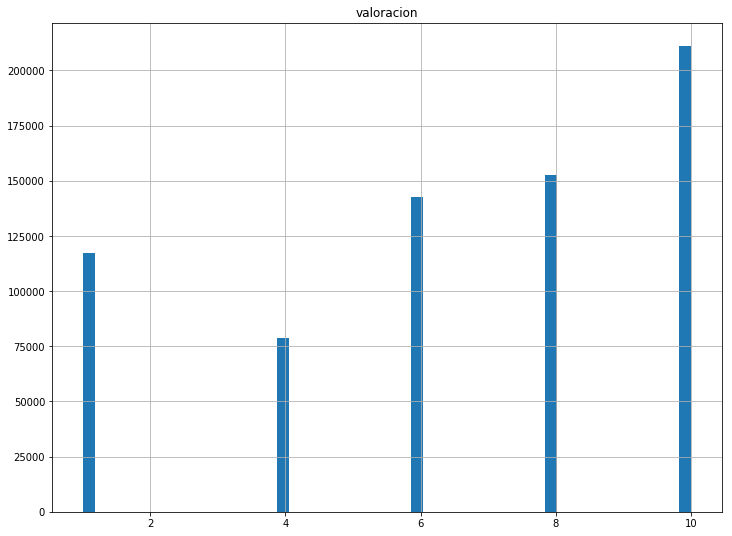

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,9))
plt.show()

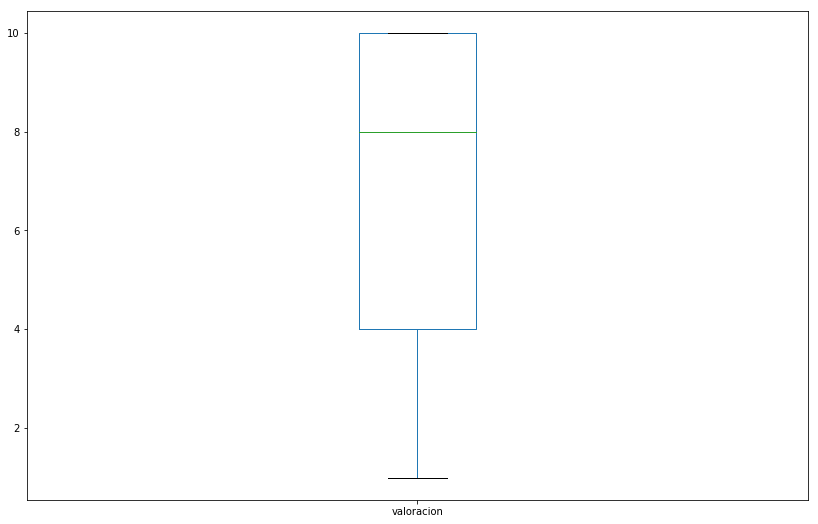

In [11]:
df.plot(kind="box", figsize=(14,9))

In [12]:
#Creamos una lista con los valores para la nueva variable valoracion positiva,negativa o neutra (basado en una categoriizacion de NPS)

nuevas_variables_valoracion = []

for fila in df["valoracion"]:
    if (fila >= 0 and fila <= 6):
        nuevas_variables_valoracion.append("negativa")
    elif (fila >= 7 and fila <= 8):        
        nuevas_variables_valoracion.append("neutra")
    else:
        nuevas_variables_valoracion.append("positiva")


In [13]:
len(nuevas_variables_valoracion)

702446

In [14]:
df["NuevaValoracion"] = nuevas_variables_valoracion

In [15]:
df.head()

,comentario,valoracion,NuevaValoracion
0,"Para chicas es perfecto, ya que la esfera no e...",8.0,neutra
1,Muy floja la cuerda y el anclaje es de mala ca...,1.0,negativa
2,"Razonablemente bien escrito, bien ambientado, ...",6.0,negativa
3,Hola! No suel o escribir muchas opiniones sobr...,10.0,positiva
4,A simple vista m parecia una buena camara pero...,1.0,negativa


In [16]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

lencoder.fit(df["NuevaValoracion"])

LabelEncoder()

In [17]:
df["clase"] = lencoder.transform(df["NuevaValoracion"])

In [18]:
df.head()

,comentario,valoracion,NuevaValoracion,clase
0,"Para chicas es perfecto, ya que la esfera no e...",8.0,neutra,1
1,Muy floja la cuerda y el anclaje es de mala ca...,1.0,negativa,0
2,"Razonablemente bien escrito, bien ambientado, ...",6.0,negativa,0
3,Hola! No suel o escribir muchas opiniones sobr...,10.0,positiva,2
4,A simple vista m parecia una buena camara pero...,1.0,negativa,0


In [19]:
#Me aseguro que no haya duplicados
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(702446, 4)

In [21]:
#Dejamos solo las variables del dataframe necesarias

del df["valoracion"]
del df["NuevaValoracion"]

In [22]:
df.head()

,comentario,clase
0,"Para chicas es perfecto, ya que la esfera no e...",1
1,Muy floja la cuerda y el anclaje es de mala ca...,0
2,"Razonablemente bien escrito, bien ambientado, ...",0
3,Hola! No suel o escribir muchas opiniones sobr...,2
4,A simple vista m parecia una buena camara pero...,0


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
# Hacemos el split de los datos en Train y Test:
train, test = train_test_split(df,
                               train_size=0.75,
                               test_size=0.25)

In [27]:
#Grid search para probar diferentes algoritmos y parametros y poder elegir el de mejor rendimiento

In [28]:
# Generamos nuestro tokenizer con NLTK:

from nltk.tokenize import RegexpTokenizer

nuestro_tokenizer = RegexpTokenizer("[\w']+")


# Stemmer...
from nltk.stem.snowball import SpanishStemmer

stemmer_castellano = SpanishStemmer()


# Función que hace la tokenization y stemming...
def nuestro_tokenizer_y_stemmer(documento):
    return [stemmer_castellano.stem(token) for token in nuestro_tokenizer.tokenize(documento)]


# Stopwords...
from nltk.corpus import stopwords

stopwords_castellano = stopwords.words("spanish")


# Hashing trick:
from sklearn.feature_extraction.text import HashingVectorizer

hashing_trick = HashingVectorizer()


# TF-IDF:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()


# Modelos:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

logreg = LogisticRegression()
adaboost = AdaBoostClassifier(base_estimator=LogisticRegression(solver="lbfgs"))
rf = RandomForestClassifier()
nb = MultinomialNB()
svm = LinearSVC()


# Pipelines:
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline(steps=[("hashing_trick", hashing_trick),
                              ("tfidf", tfidf_transformer),
                              ("logreg", logreg)])

pipeline_adaboost = Pipeline(steps=[("hashing_trick", hashing_trick),
                                    ("tfidf", tfidf_transformer),
                                    ("adaboost", adaboost)])

pipeline_rf = Pipeline(steps=[("hashing_trick", hashing_trick),
                              ("tfidf", tfidf_transformer),
                              ("rf", rf)])

pipeline_nb = Pipeline(steps=[("hashing_trick", hashing_trick),
                              ("tfidf", tfidf_transformer),
                              ("nb", nb)])

pipeline_svm = Pipeline(steps=[("hashing_trick", hashing_trick),
                               ("tfidf", tfidf_transformer),
                               ("svm", svm)])


# Grids de hiperparámetros:
param_grid_lr = {"hashing_trick__strip_accents": ["ascii"],
                 "hashing_trick__analyzer": ["word"],
                 "hashing_trick__stop_words": [stopwords_castellano],
                 "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer], 
                 "hashing_trick__lowercase": [True],
                 "hashing_trick__norm" : [None],
                 "hashing_trick__n_features": [2**20, 2**22], # Distintas longitudes de vector
                 "hashing_trick__ngram_range": [(1,1), (1,2)], # solo monogramas (estándar),
                                                                      # monogramas y bigramas
                 "logreg__solver": ["lbfgs"]
                }

param_grid_adaboost = {"hashing_trick__strip_accents": ["ascii"],
                       "hashing_trick__analyzer": ["word"],
                       "hashing_trick__stop_words": [stopwords_castellano],
                       "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                       "hashing_trick__lowercase": [True],
                       "hashing_trick__norm" : [None],
                       "hashing_trick__n_features": [2**20, 2**22],
                       "hashing_trick__ngram_range": [(1,1), (1,2)],
                       "adaboost__n_estimators": [200]
                      }

param_grid_rf = {"hashing_trick__strip_accents": ["ascii"],
                 "hashing_trick__analyzer": ["word"],
                 "hashing_trick__stop_words": [stopwords_castellano],
                 "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                 "hashing_trick__lowercase": [True],
                 "hashing_trick__norm" : [None],
                 "hashing_trick__n_features": [2**22],
                 "hashing_trick__ngram_range": [(1,1), (1,2)],
                 "rf__n_estimators": [100, 200],  
                 "rf__max_depth": [10,20],
                 "rf__min_samples_split": [5,10],
                 "rf__min_samples_leaf": [5]
                }

param_grid_nb = {"hashing_trick__strip_accents": ["ascii"],
                 "hashing_trick__analyzer": ["word"],
                 "hashing_trick__stop_words": [stopwords_castellano],
                 "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                 "hashing_trick__lowercase": [True],
                 "hashing_trick__norm" : [None],
                 "hashing_trick__n_features": [2**20, 2**22],
                 "hashing_trick__ngram_range": [(1,1), (1,2)],
                 "hashing_trick__non_negative": [True], # Necesario para el Naïve Bayes
                 "tfidf__norm": [None], # Preferible para el Naïve Bayes (debería mejorar resultados)
                 "nb__alpha": [0.001, 0.5, 1.0]
                }

param_grid_svm = {"hashing_trick__strip_accents": ["ascii"],
                  "hashing_trick__analyzer": ["word"],
                  "hashing_trick__stop_words": [stopwords_castellano],
                  "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                  "hashing_trick__lowercase": [True],
                  "hashing_trick__norm" : [None],
                  "hashing_trick__n_features": [2**20, 2**22],
                  "hashing_trick__ngram_range": [(1,1), (1,2)],
                  "tfidf__norm": [None, "l2"],
                  "svm__penalty": ["l1", "l2"],
                  "svm__dual": [False]
                }


# Instancias de Grid Search:
from sklearn.model_selection import GridSearchCV

gs_logreg = GridSearchCV(estimator=pipeline_lr,
                         param_grid=param_grid_lr,
                         scoring="accuracy",
                         cv=2,
                         n_jobs=-2,
                         verbose=1)

gs_adaboost = GridSearchCV(estimator=pipeline_adaboost,
                           param_grid=param_grid_adaboost,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=-2,
                           verbose=1)

gs_rf = GridSearchCV(estimator=pipeline_rf,
                     param_grid=param_grid_rf,
                     scoring="accuracy",
                     cv=2,
                     n_jobs=-2,
                     verbose=1)

gs_nb = GridSearchCV(estimator=pipeline_nb,
                     param_grid=param_grid_nb,
                     scoring="accuracy",
                     cv=2,
                     n_jobs=-2,
                     verbose=1)

gs_svm = GridSearchCV(estimator=pipeline_svm,
                     param_grid=param_grid_svm,
                     scoring="accuracy",
                     cv=2,
                     n_jobs=-2,
                     verbose=1)

# Los metemos todos en un diccionario:

bag_de_modelos = {"Logistic Regression": gs_logreg,
                  "Random Forests": gs_rf,
                  "Adaboost": gs_adaboost,
                  "Naive Bayes": gs_nb,
                  "SVM Lineal": gs_svm
                 }

In [ ]:
for nombre, gs in bag_de_modelos.items():
    print("Haciendo Grid Search de la Pipeline de %s..." % nombre)
    gs.fit(X=train["comentario"], y=train["clase"])
    print("¡Grid Search de la Pipeline de %s realizada!" % nombre)

Haciendo Grid Search de la Pipeline de Logistic Regression...
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


In [ ]:
#cuál ha dado mejor ACCURACY en valizadión cruzada...

In [ ]:
for nombre, pipeline in bag_de_modelos.items():
    print("Accuracy en CV de la mejor Pipeline de %s:\t%s" % (nombre, pipeline.best_score_))
    
mejor_pipeline = (None, float("-inf"))
for nombre, pipeline in bag_de_modelos.items():
    if pipeline.best_score_ > mejor_pipeline[1]:
        mejor_pipeline = (nombre, pipeline.best_score_)
        
print("\nLa mejor Pipeline es entonces %s, con ACCURACY de %s" % (mejor_pipeline[0], mejor_pipeline[1]))

In [ ]:
# Vamos a re-entrenar el mejor modelo ganador con todo el conjunto de train (sin validación, para entrenar con la mayor cantidad de datos posibles)

In [ ]:
pipeline_elegida = bag_de_modelos[mejor_pipeline[0]].best_estimator_

In [ ]:
pipeline_elegida.fit(X=train["comentario"], y=train["clase"])

In [ ]:
Sacamos precision, recall, f1-score y accuracy en el conjunto de test:

In [ ]:
from sklearn.metrics import classification_report

reporte_clasif = classification_report(y_true = test["clase"],
                                       y_pred = pipeline_elegida.predict(X=test["comentario"])
                                      )

print("Métricas de rendimiento en el conjunto de test:")
print(reporte_clasif)

In [ ]:
from sklearn.metrics import accuracy_score

accur = accuracy_score(y_true = test["clase"],
                       y_pred = pipeline_elegida.predict(X=test["comentario"])
                      )
print("Accuracy en el conjunto de test: %s" % accur)

In [ ]:
#Curva ROC para el conjunto de test

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
plt.style.use("ggplot")

roc = roc_curve(y_true = test["clase"],
                y_score = pipeline_elegida.predict(X=test["comentario"]),
                pos_label=1.0
               )
                
coordenadas_fpr = roc[0]
coordenadas_tpr = roc[1]
                
# Y computamos el área bajo la curva ROC
# sobre el conjunto de testing:             
auc = roc_auc_score(y_true = test["clase"],
                    y_score = pipeline_elegida.predict(X=test["comentario"])
                   )


# Y dibujamos:
plt.figure(figsize=(5,5))

# Primero pintamos el random guess:
plt.plot([0,1],[0,1], "g--")

# Y ahora el FPR y TPR de nuestro modelo:
plt.plot(coordenadas_fpr, coordenadas_tpr, "b", label="AUC: %s" % auc)

# Coloreamos el área bajo la curva
plt.fill_between(coordenadas_fpr, coordenadas_tpr, alpha=0.4, color="yellow")

plt.title("Curva ROC pipeline %s (conjunto de test)" % mejor_pipeline[0], fontsize=11)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4, fontsize=9)
pass

In [ ]:
pipeline_elegida.steps